# Experimentations with fundamental concepts of deep learning

## Forward and Backward pass

In [2]:
import torch
from icecream import ic

Input and ground truth output

In [3]:
x = torch.randn((2, 1), requires_grad=True)
y = torch.randn((2,1))
ic(x, y)

ic| x: tensor([[-1.2413],
               [ 0.4187]], requires_grad=True)
    y: tensor([[0.1538],
               [1.3876]])


(tensor([[-1.2413],
         [ 0.4187]], requires_grad=True),
 tensor([[0.1538],
         [1.3876]]))

### The forward pass

First linear layer

In [4]:
W1 = torch.randn((2, 2), requires_grad=True)
b1 = torch.randn((2, 1), requires_grad=True)
z1 = torch.matmul(W1, x) + b1
ic(W1, b1, z1)

ic| W1: tensor([[-0.8255,  1.1034],
                [-0.4116,  0.6273]], requires_grad=True)
    b1: tensor([[-0.3685],
                [-0.7077]], requires_grad=True)
    z1: tensor([[1.1181],
                [0.0658]], grad_fn=<AddBackward0>)


(tensor([[-0.8255,  1.1034],
         [-0.4116,  0.6273]], requires_grad=True),
 tensor([[-0.3685],
         [-0.7077]], requires_grad=True),
 tensor([[1.1181],
         [0.0658]], grad_fn=<AddBackward0>))

Retain the grads of the loss with respect to these variables to print out later

In [5]:
W1.retain_grad()
b1.retain_grad()
z1.retain_grad()

Non-linear activation

In [6]:
z2 = torch.nn.functional.relu(z1)
ic(z2)

ic| z2: tensor([[1.1181],
                [0.0658]], grad_fn=<ReluBackward0>)


tensor([[1.1181],
        [0.0658]], grad_fn=<ReluBackward0>)

Linear layer 2

In [7]:
W2 = torch.randn((2, 2), requires_grad=True)
b2 = torch.randn((2, 1), requires_grad=True)
z3 = torch.matmul(W2, z2) + b2
ic(W2, b2, z3)

ic| W2: tensor([[0.1843, 0.8053],
                [0.3552, 0.4394]], requires_grad=True)
    b2: tensor([[-0.3688],
                [-1.1466]], requires_grad=True)
    z3: tensor([[-0.1097],
                [-0.7205]], grad_fn=<AddBackward0>)


(tensor([[0.1843, 0.8053],
         [0.3552, 0.4394]], requires_grad=True),
 tensor([[-0.3688],
         [-1.1466]], requires_grad=True),
 tensor([[-0.1097],
         [-0.7205]], grad_fn=<AddBackward0>))

In [8]:
W2.retain_grad()
b2.retain_grad()
z3.retain_grad()

Calculate the loss function (MSE loss)

In [36]:
loss = torch.mean(torch.square(y-z3))
ic(loss)

ic| loss: tensor(2.2567, grad_fn=<MeanBackward0>)


tensor(2.2567, grad_fn=<MeanBackward0>)

Verify with `torch`'s `mse_loss`

In [33]:
torch.nn.functional.mse_loss(z3, y, reduction='mean')  # check if our loss is correct

tensor(2.2567, grad_fn=<MseLossBackward>)

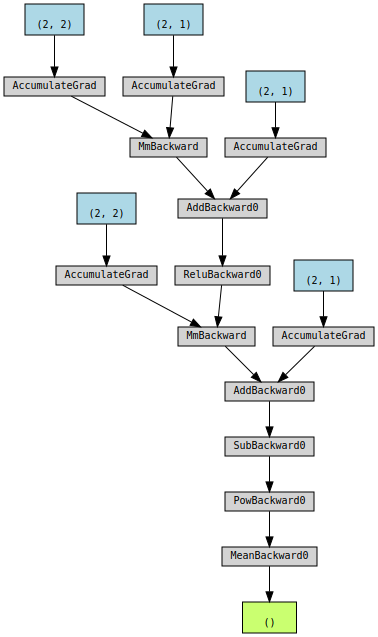

In [37]:
from torchviz import make_dot
make_dot(loss)

### The backward pass

In [38]:
loss.backward()  # too convenient to be real!

Print out the derivatives of the loss with respect to the variables

In [39]:
ic(x.grad, W1.grad, b1.grad, W2.grad, b2.grad, z3.grad)

ic| x.grad: tensor([[ 1.1268],
                    [-1.5939]])
    W1.grad: tensor([[ 0.9897, -0.3338],
                     [ 1.4131, -0.4766]])
    b1.grad: tensor([[-0.7973],
                     [-1.1385]])
    W2.grad: tensor([[-0.2947, -0.0174],
                     [-2.3570, -0.1388]])
    b2.grad: tensor([[-0.2636],
                     [-2.1081]])
    z3.grad: tensor([[-0.2636],
                     [-2.1081]])


(tensor([[ 1.1268],
         [-1.5939]]),
 tensor([[ 0.9897, -0.3338],
         [ 1.4131, -0.4766]]),
 tensor([[-0.7973],
         [-1.1385]]),
 tensor([[-0.2947, -0.0174],
         [-2.3570, -0.1388]]),
 tensor([[-0.2636],
         [-2.1081]]),
 tensor([[-0.2636],
         [-2.1081]]))

In [84]:
2*(z3-y)/2

tensor([[-0.2636],
        [-2.1081]], grad_fn=<DivBackward0>)

## Understanding Backprop through ReLU

<img src="figures/reluBackprop.png"></img>
Figure from [datahacker.rs](http://datahacker.rs/009-pytorch-how-to-apply-backpropagation-with-vectors-and-tensors/)

In [87]:
x = torch.tensor([1.,-2.,3.,-1.], requires_grad=True)
ic(x)
y = torch.relu(x)
ic(y)
dL_over_dy = torch.tensor([4,-1,5,9])
y.backward(dL_over_dy)
ic(x.grad)

ic| x: tensor([ 1., -2.,  3., -1.], requires_grad=True)
ic| y: tensor([1., 0., 3., 0.], grad_fn=<ReluBackward0>)
ic| x.grad: tensor([4., 0., 5., 0.])


tensor([4., 0., 5., 0.])